In [52]:
# environment set up
import keras
from keras.models import Sequential
from keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import tensorflow as tf # only use tensorflow keras
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd

# working folder
directory = "/Users/Srikar/Desktop/Velexi/spectra-ml/data"
os.chdir(directory)

# print(os.getcwd())

In [53]:
# dataset = str(directory + "/dataset3")
# num_samples = len([name for name in os.listdir(dataset) if \
#                    os.path.isfile(os.path.join(dataset,name))])

# print(num_samples)

In [48]:
metadata = pd.read_csv("/Users/Srikar/Desktop/Velexi/spectra-ml/data/Srikar-Standardized/spectra-metadata.csv")
metadata.head()

,id|material|spectrometer_purity_code|measurement_type|raw_data_path
0,23077|Rangeland C03-022 S12% G22%|ASDFRa|AREF|...
1,22344|Marsh SPAL92%...a CRMS322v78|ASDFRa|AREF...
2,22136|Tumbleweed ANP92-2C Dry|BECKa|AREF|Chapt...
3,24017|Rangeland L02-069 S00% G99%|ASDFRa|AREF|...
4,21060|Douglas-Fir YNP-DF-1 forest|AVIRISb|RTGC...


In [49]:
def find_record(string):
    ind = string.find("|")
    return string[:ind]

In [54]:
actinolite = []
alunite = []
chlorite = []

num_samples = 0

for i in range(metadata.shape[0]):
    data = metadata.iloc[i, 0]
    if data[:4] != "bars":
        if data.find("Actinolite") != -1: # if material name contains actinolite
            actinolite.append(find_record(data))
            num_samples += 1
        elif data.find("Alun") != -1:
            alunite.append(find_record(data))
            num_samples += 1
        elif (data.find("Chlorit") != -1 or data.find("Chlor") != -1 or data.find("Chlor+") != -1 or data.find("Chl.") != -1):
            chlorite.append(find_record(data))
            num_samples += 1

num_samples

118

In [ ]:
spectrum_len = 500
spectra = np.zeros((num_samples,spectrum_len))

y = np.zeros((num_samples, 1))

In [30]:
# spectrum_len = 480
# spectra = np.zeros((num_samples,spectrum_len))

# spectrum_categories = np.zeros(num_samples)
# first_record_of_mixtures_chapter = 11602
# is_a_mineral = 1                                   # these numbers match the chapter numbers given by usgs
# is_a_mixture = 2
# spectrum_names = ["" for x in range(num_samples)]

# y = np.zeros((num_samples, 1))

# os.chdir(dataset)

# i = 0

# for filename in os.listdir(dataset):
#     file_object  = open(filename, 'r').readlines()
# #     strip off header, add to matrix 'spectra'
#     spectra[i,:] = file_object[1:]

# #     label spectrum class, based on header
# #     actinolite: 0, alunite: 1, chlorite: 2
#     material_name = file_object[0]
    
#     spectrum_names[i] = material_name
    
#     start = 'Record='
#     end = ':'
#     record_number = int((material_name.split(start))[1].split(end)[0])
#     # print(record_number)
#     if record_number < first_record_of_mixtures_chapter:
#         spectrum_categories[i] = is_a_mineral
#     else:
#         spectrum_categories[i] = is_a_mixture

# #     print(material_name)

#     if material_name.find('Actinolite',) != -1: # if material name contains actinolite
#         y[i,0] = 0
#     elif material_name.find('Alun',)!= -1:
#         y[i,0] = 1
#     else: # chlorite
#         y[i,0] = 2

# #     turn missing points into 0
#     for j in range(spectrum_len):
#         if spectra[i,j] < 0:
#             spectra[i,j] = 0
#     i+=1

In [31]:
sample_indices = list(range(0, num_samples))
print(num_samples)
random.shuffle(sample_indices)
train_set_size = 3*(num_samples//5)
dev_set_size = (num_samples//5)
test_set_size= num_samples-dev_set_size - train_set_size
print(train_set_size)
print(test_set_size)
print(dev_set_size)
train_set_indices = sample_indices[:train_set_size]
dev_set_indices = sample_indices[train_set_size: train_set_size+dev_set_size]
test_set_indices= sample_indices[train_set_size+dev_set_size: num_samples]
print(train_set_indices)
print(test_set_indices)
print(dev_set_indices)

train_set = spectra[train_set_indices, :]
train_labels = y[train_set_indices, :]
dev_set = spectra[dev_set_indices, :]
dev_labels = y[dev_set_indices, :]
test_set = spectra[test_set_indices, :]
test_labels = y[test_set_indices, :]

33
18
9
6
[10, 28, 0, 17, 25, 30, 31, 27, 32, 5, 1, 15, 26, 8, 7, 3, 21, 11]
[20, 9, 2, 18, 16, 22, 19, 23, 13]
[12, 24, 6, 29, 14, 4]


In [32]:
train_labels = train_labels.flatten()
dev_labels = dev_labels.flatten()
test_labels = test_labels.flatten()
# type(train_labels)

In [33]:
# len(train_set)
# len(train_set[17])
print(test_set.shape)

(9, 480)


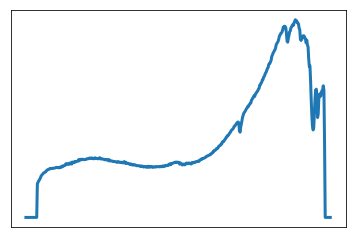

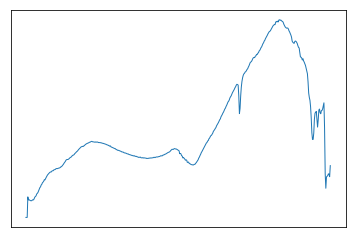

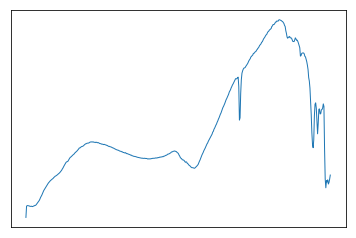

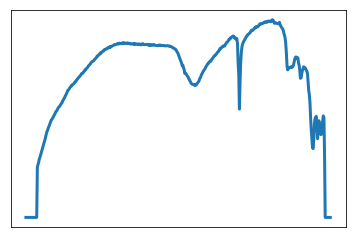

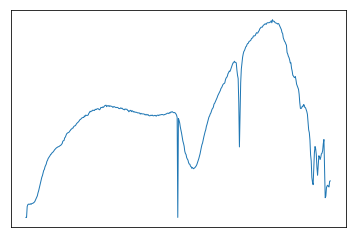

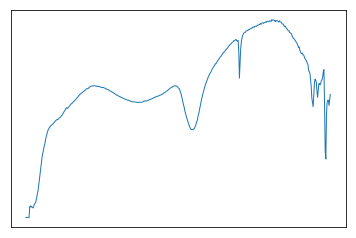

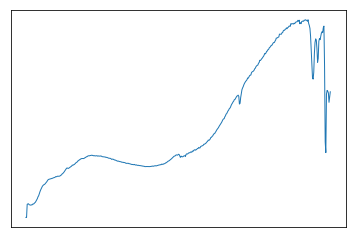

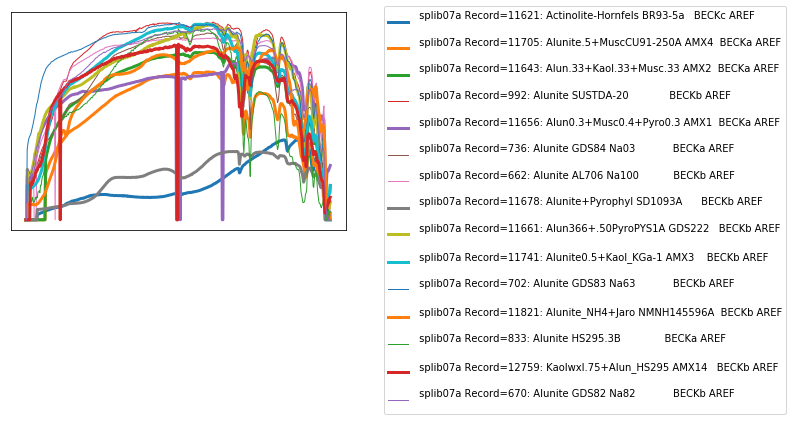

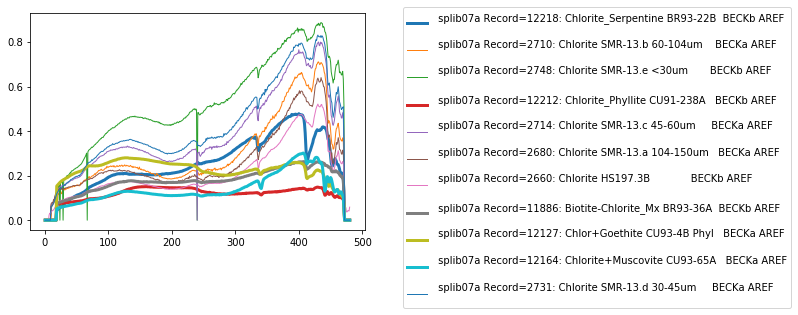

In [35]:
# --- plot the classes

# plot each class in a separate plot
# plot spectra names in legend
# plot minerals and mixtures w diff line widths

mineral_names = ["Actinolite", "Alunite", "Chlorite"]

# variables
num0 = 0 #number of samples of class 0
num1 = 0
num2 = 0

mineral_linewidth = 1         # linewidth = 1 is default
mixture_linewidth = 3         

# count the number of each class to make spectra0, spectra1, spectra2 databases
for i in range(num_samples):
    if y[i,0]== 0:
        num0 += 1
    elif y[i,0]== 1:
        num1 += 1
    elif y[i,0]== 2:
        num2 += 1

# make class-specific databases spectra0, ...1, ...2
spectra0 = np.zeros((num0,spectrum_len)) 
spectra1 = np.zeros((num1,spectrum_len)) 
spectra2 = np.zeros((num2,spectrum_len)) 

labels0 = ["" for x in range(num0)]
labels1 = ["" for x in range(num1)]
labels2 = ["" for x in range(num2)]

linewidth0 = np.zeros(num0)
linewidth1 = np.zeros(num1)
linewidth2 = np.zeros(num2)


# make counters for each database to place spectra
i0 = 0
i1 = 0
i2 = 0

# set linewidth for the spectrum 
# populate class-specific databases spectra0, ...1, ...2
for i in range(num_samples):
    
    # set linewidth
    #testcode
    #print(spectrum_categories)
    #print(spectrum_categories[i])
    
    if spectrum_categories[i] == is_a_mineral:
        linewidth = mineral_linewidth
        
        #testcode
        #print('min')
    else: 
        linewidth = mixture_linewidth
        
        #testcode
        #print('mix')
    
    # populate matrices for making each class plot
    if y[i,0]== 0:
        spectra0[i0,:] = spectra[i,:]
        labels0[i0] = spectrum_names[i]
        linewidth0[i0] = linewidth
        i0 +=1
    elif y[i,0]== 1:
        spectra1[i1,:] = spectra[i,:]
        labels1[i1] = spectrum_names[i]
        linewidth1[i1] = linewidth
        i1 +=1
    else:
        spectra2[i2,:] = spectra[i,:]
        labels2[i2] = spectrum_names[i]
        linewidth2[i2] = linewidth
        i2 +=1

# plot each class-specific database separately
for i in range(i0):
    fig = plt.figure()
    plt.plot(range(1, spectrum_len+1), spectra0[i,:], label = labels0[i], linewidth = linewidth0[i]) # remove linewidth for all mixtures/minerals to be standard
    plt.xticks([])
    plt.yticks([])
#     plt.show()
    path = "/Users/Srikar/Desktop/Velexi/spectra-ml/lab-notebook/smunukutla/plots/" + mineral_names[0] + str(i) + ".png"
    fig.savefig(path, format = "PNG")
# plt.legend(bbox_to_anchor=(1.1, 1.05))

for i in range(i1):
    plt.plot(range(1, spectrum_len+1), spectra1[i,:], label = labels1[i], linewidth = linewidth1[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

for i in range(i2):
    plt.plot(range(1, spectrum_len+1), spectra2[i,:], label = labels2[i], linewidth = linewidth2[i])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [19]:
train_set = np.reshape(train_set, (train_set.shape[0], 480, 1))
dev_set = np.reshape(dev_set, (dev_set.shape[0], 480, 1))
test_set = np.reshape(test_set, (test_set.shape[0], 480, 1))

train_labels = np.reshape(train_labels, (train_labels.shape[0], 1))
dev_labels = np.reshape(dev_labels, (dev_labels.shape[0], 1))
test_labels = np.reshape(test_labels, (test_labels.shape[0], 1))

train_labels = to_categorical(train_labels)
dev_labels = to_categorical(dev_labels)
test_labels = to_categorical(test_labels)

In [20]:
print(train_labels)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [21]:
model = Sequential()
# model.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model.add(Conv1D(64, 25, activation='relu', input_shape=(train_set.shape[1], 1)))
model.add(Conv1D(64, 25, activation='relu'))
model.add(MaxPooling1D(4)) # 108 by 64 so far
model.add(Conv1D(100, 25, activation='relu'))
model.add(Conv1D(100, 25, activation='relu'))
model.add(MaxPooling1D(4))
# model.add(Dropout(0.5))
# model.add(GlobalAveragePooling1D())
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 456, 64)           1664      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 432, 64)           102464    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 108, 64)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 84, 100)           160100    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 60, 100)           250100    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 15, 100)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1500)              0         
__________

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 12
EPOCHS = 50

print(train_labels.shape)
model.fit(train_set, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=(dev_set, dev_labels)) 

(18, 3)
Train on 18 samples, validate on 6 samples
Epoch 1/50
18/18 [==============================] - 1s 42ms/step - loss: 1.0390 - acc: 0.2778 - val_loss: 1.3904 - val_acc: 0.3333
Epoch 2/50
18/18 [==============================] - 0s 14ms/step - loss: 0.9769 - acc: 0.4444 - val_loss: 1.1390 - val_acc: 0.3333
Epoch 3/50
18/18 [==============================] - 0s 12ms/step - loss: 0.8984 - acc: 0.4444 - val_loss: 1.0242 - val_acc: 0.3333
Epoch 4/50
18/18 [==============================] - 0s 13ms/step - loss: 0.9403 - acc: 0.4444 - val_loss: 1.0085 - val_acc: 0.3333
Epoch 5/50
18/18 [==============================] - 0s 11ms/step - loss: 0.8940 - acc: 0.4444 - val_loss: 1.0783 - val_acc: 0.3333
Epoch 6/50
18/18 [==============================] - 0s 13ms/step - loss: 0.8862 - acc: 0.4444 - val_loss: 1.2133 - val_acc: 0.3333
Epoch 7/50
18/18 [==============================] - 0s 18ms/step - loss: 0.8233 - acc: 0.4444 - val_loss: 1.0062 - val_acc: 0.3333
Epoch 8/50
18/18 [==============

In [24]:
y_pred = model.predict(test_set)
y_pred

array([[2.40771621e-01, 6.79636014e-10, 7.59228349e-01],
       [2.83774823e-01, 7.00521231e-01, 1.57039016e-02],
       [3.08332019e-05, 7.28542039e-20, 9.99969125e-01],
       [1.75225928e-01, 1.64554513e-03, 8.23128521e-01],
       [9.89131868e-01, 9.28157134e-11, 1.08681405e-02],
       [0.00000000e+00, 1.00000000e+00, 8.98523842e-38],
       [1.75665635e-29, 1.00000000e+00, 1.47989155e-28],
       [2.00924389e-36, 1.00000000e+00, 2.15823477e-38],
       [3.38778638e-30, 1.00000000e+00, 3.24230259e-32]], dtype=float32)

In [25]:
test_labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [27]:
model.evaluate(test_set, test_labels)

9/9 [==============================] - 0s 7ms/step


[0.5149889588356018, 0.8888888955116272]